# Employee Overall Performance

### Importing Packages

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [43]:
warnings.filterwarnings('ignore')

## Exploratory Data Anlysis (EDA)
- Merging Dataset
- Describe Dataset
- Information Dataset
- N-Unique values in Dataset 
- Value counts in Dataset
- Null Values in Dataset
- Correlations of numerical dtypes
- Checking for the outliers
- Splitting in Features and label

### Loading Dataset

In [44]:
demographic = pd.read_csv('demographic_detail.csv')
roster_with_score = pd.read_csv("roster_with_score.csv")
df = pd.merge(roster_with_score,demographic,on='employee_id')
df = df.drop(['Unnamed: 0_x','Unnamed: 0_y','first','last','employee_id'],axis=1)

### Describe Dataset

In [45]:
df.describe()

,manager_id,tenure_id,alignment,development,enablement,engagement,leadership,overall,year_of_birth,time_on_the_job
count,380.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,373.263158,2.181102,0.780402,0.671391,0.781627,0.794646,0.823447,0.770303,1981.671916,25.488189
std,227.816779,1.197040,0.085913,0.100472,0.121302,0.069348,0.126808,0.069176,11.250496,18.178298
min,11.000000,0.000000,0.533333,0.333333,0.333333,0.600000,0.333333,0.568000,1949.000000,0.000000
25%,183.000000,2.000000,0.733333,0.600000,0.733333,0.760000,0.733333,0.736000,1976.000000,13.000000
50%,365.000000,2.000000,0.800000,0.666667,0.800000,0.800000,0.866667,0.773333,1982.000000,20.000000
75%,572.000000,3.000000,0.866667,0.733333,0.866667,0.840000,0.933333,0.813333,1989.000000,38.000000
max,756.000000,4.000000,1.000000,0.933333,1.000000,0.920000,1.000000,0.949333,2003.000000,72.000000


### Information Dataset

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 380
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              381 non-null    object 
 1   manager_id         380 non-null    float64
 2   function           381 non-null    object 
 3   department         381 non-null    object 
 4   location           381 non-null    object 
 5   age                381 non-null    object 
 6   sex                381 non-null    object 
 7   ethnicity          381 non-null    object 
 8   employment_status  381 non-null    object 
 9   tenure             381 non-null    object 
 10  tenure_id          381 non-null    int64  
 11  alignment          381 non-null    float64
 12  development        381 non-null    float64
 13  enablement         381 non-null    float64
 14  engagement         381 non-null    float64
 15  leadership         381 non-null    float64
 16  overall            381 non

### N-Unique value in Dataset

In [47]:
df.select_dtypes(['object']).nunique()

title                59
function              8
department           36
location              5
age                   6
sex                   2
ethnicity             5
employment_status     2
tenure                5
dtype: int64

In [48]:
df.select_dtypes(['int64','float64']).nunique()

manager_id          59
tenure_id            5
alignment           10
development         12
enablement          14
engagement          11
leadership          12
overall            155
year_of_birth       51
time_on_the_job     71
dtype: int64

### Value counts In Dataset

In [49]:
df.value_counts()

title                   manager_id  function         department    location           age      sex  ethnicity  employment_status  tenure                  tenure_id  alignment  development  enablement  engagement  leadership  overall   year_of_birth  time_on_the_job
Accountant              234.0       Loan Operations  Finance       Mountain View, CA  18 - 24  M    white      Part time          2 to less than 4 years  3          0.800000   0.733333     0.866667    0.84        1.000000    0.848000  1999           35                 1
Manager of Engineering  580.0       Engineering      Full Stack    Mountain View, CA  25 - 34  M    asian      Full time          1 to less than 2 years  2          0.866667   0.733333     0.666667    0.84        0.800000    0.781333  1987           24                 1
Marketing Analyst       495.0       Finance & Admin  Marketing     New York, NY       35 - 44  F    white      Full time          2 to less than 4 years  3          0.733333   0.733333     0.8

### Null Values in Dataset

In [50]:
df.isnull().sum()
df = df.dropna()

### Correlations of numerical dtypes

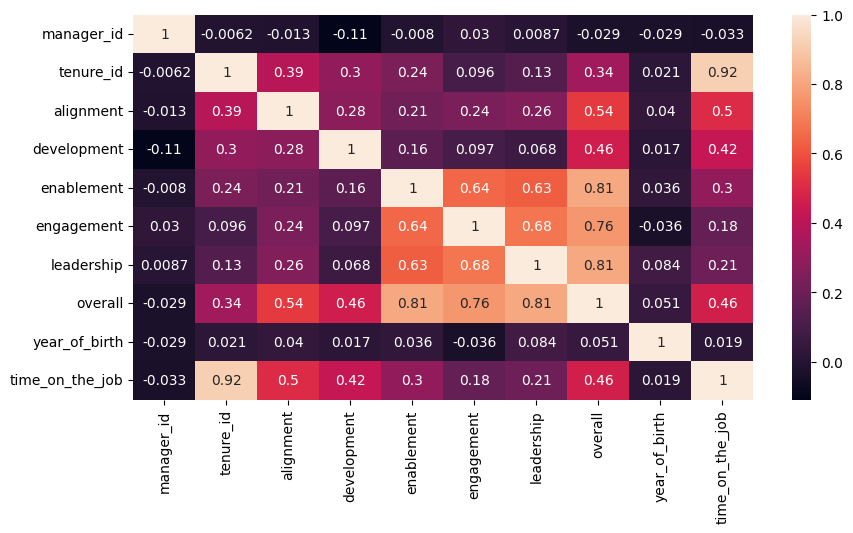

In [51]:
df_numerical = df.select_dtypes(['float64','int64'])
numerical_corr_mat = df_numerical.corr()
plt.figure(figsize=(10,5))
sns.heatmap(numerical_corr_mat,annot=True)
plt.show()

### Overall vs Engagement

Text(0.5, 1.0, 'Overall vs Engagement')

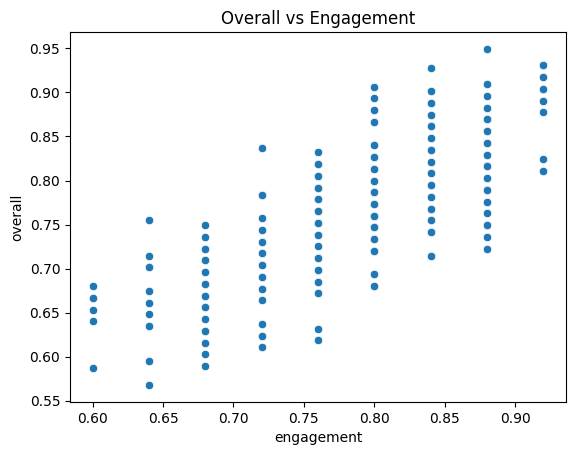

In [52]:
sns.scatterplot(data=df_numerical,x='engagement',y='overall')
plt.title('Overall vs Engagement')

### Overall vs Leadership

Text(0.5, 1.0, 'Overall vs Leadership')

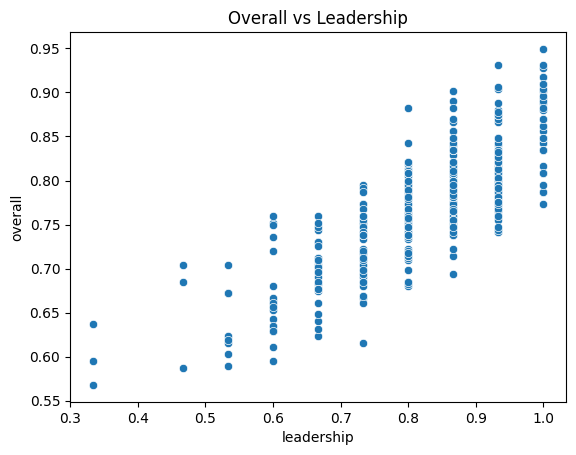

In [53]:
sns.scatterplot(data=df_numerical,x='leadership',y='overall')
plt.title('Overall vs Leadership')

Text(0.5, 1.0, 'Overall vs Leadership')

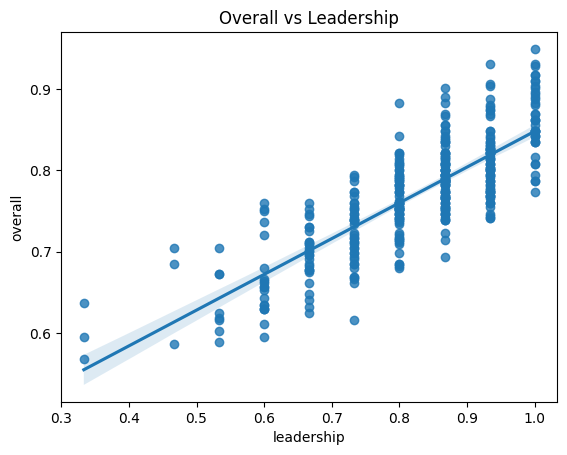

In [54]:
sns.regplot(data=df_numerical,x='leadership',y='overall')
plt.title('Overall vs Leadership')

### Checking for the Outliers

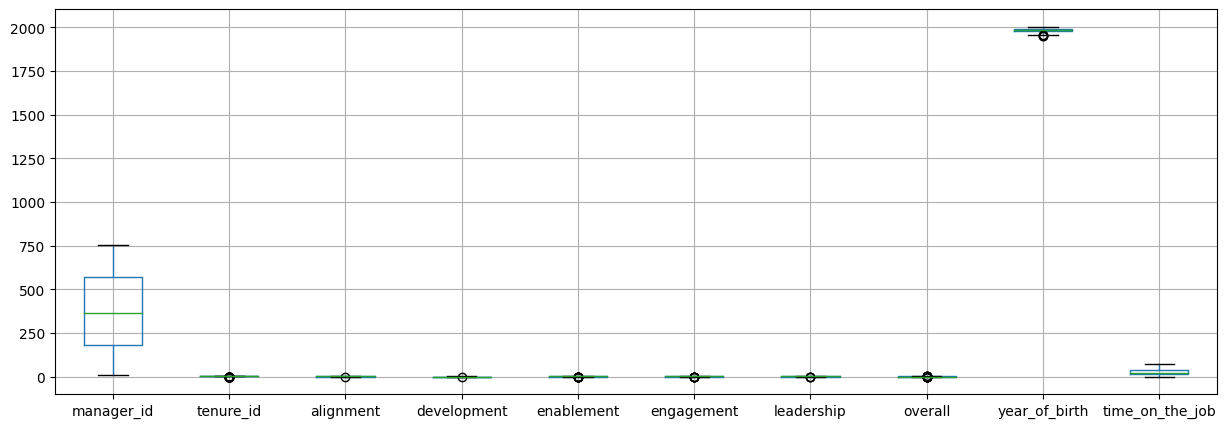

In [55]:
plt.figure(figsize=(15,5))
df_numerical.boxplot()
plt.show()

### Splitting in Features and Label

In [56]:
X_features = df.copy()
y_label = df[['overall']]

##  Data Preprocessing
- Data Encoding
- Data Standardization
- Feature and Label Prepared
- Train and Test split

### Data Encoding

In [57]:
encoder = OrdinalEncoder()
X_features_encoded = encoder.fit_transform(X_features)

### Data Standardization

In [58]:
scaler  = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features_encoded)

### Feature and Label Prepared

In [59]:
X_prepared = pd.DataFrame(X_features_scaled,columns=X_features.columns)
y_prepared = y_label.copy()

### Train and Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared,y_prepared,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(304, 19) (76, 19)
(304, 1) (76, 1)


## Model Building
- Model Selection
- Model Evaluation
    - Cross Val Score
    - Cross Val Predict
- Model Hyperparameter Tuning
- Model fit on test set    

### Model Selection

In [61]:
lin_reg = LinearRegression()
svm_reg = SVR()
tree_reg = DecisionTreeRegressor()

### Model Evaluation
- As per the observation linear regression would be working better (as we cannot get actual MSE because we have very few instances).

### Cross Val Score

In [70]:
for reg in (lin_reg,svm_reg,tree_reg):
    score = cross_val_score(reg,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
    print(f"{reg.__class__.__name__}\nScore:{np.sqrt(-score)}\nMean:{np.mean(-score)}")

LinearRegression
Score:[0.00705614 0.00645115 0.00498061 0.00566725 0.00541468 0.006934
 0.00457028 0.00464942 0.00640713 0.0046567 ]
Mean:3.309704270319547e-05
SVR
Score:[0.04933148 0.03800697 0.05189281 0.04898566 0.05596575 0.05339302
 0.04759637 0.05113829 0.06355163 0.04943257]
Mean:0.0026316491416410936
DecisionTreeRegressor
Score:[0.00299103 0.00244216 0.00431053 0.00229695 0.00398516 0.00271075
 0.00266667 0.00238514 0.00262185 0.00194746]
Mean:8.546332138590109e-06


### Cross Val Predict
R2 Score (Linear Regression): 0.99% Score which states that on cv=10 X_train and y_train are perfectly fitted.

In [73]:
for reg in (lin_reg,svm_reg,tree_reg):
    pred_score = cross_val_predict(reg,X_train,y_train,cv=10)
    print(f"{reg.__class__.__name__} R2 Score:{r2_score(y_train,pred_score)}")

LinearRegression R2 Score:0.9933512122107213
SVR R2 Score:0.47319708965201557
DecisionTreeRegressor R2 Score:0.9977151455992785


### Model Hyperparamter Tuning

In [78]:
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

grid_search = GridSearchCV(lin_reg,param_grid,cv=10,n_jobs=-1)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

LinearRegression(normalize=True)
{'fit_intercept': True, 'normalize': True}
0.9922781545570072


### Model fit on test set

In [80]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
print(f'{final_model.__class__.__name__} Score:{mean_squared_error(y_test,y_pred)}')
print(f"{final_model.__class__.__name__} R2 Score:{r2_score(y_test,y_pred)}")

LinearRegression Score:4.372416504575785e-05
LinearRegression R2 Score:0.9888937611536567


### `NOTE:` End to End Machine learning project has done Employee Performance for more visit: www.github.com/itechdp